In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.signal
import scipy.stats
import matplotlib.pyplot as plt
import mplhep
import pandas as pd

In [2]:
eu_df = pd.read_csv('152Eu.csv', skiprows=21)
bkg_df = pd.read_csv('bkg.csv', skiprows=21)

In [3]:
channels = eu_df['Channel'].to_numpy()
eu_counts = eu_df['Counts'].to_numpy()
bkg_counts = bkg_df['Counts'].to_numpy()

eu_counts -= bkg_counts
eu_counts = eu_counts / 1200

In [4]:
calibrationVals = [2.27306926, 56.76252822]
channels_calib = (channels - calibrationVals[1]) / calibrationVals[0]

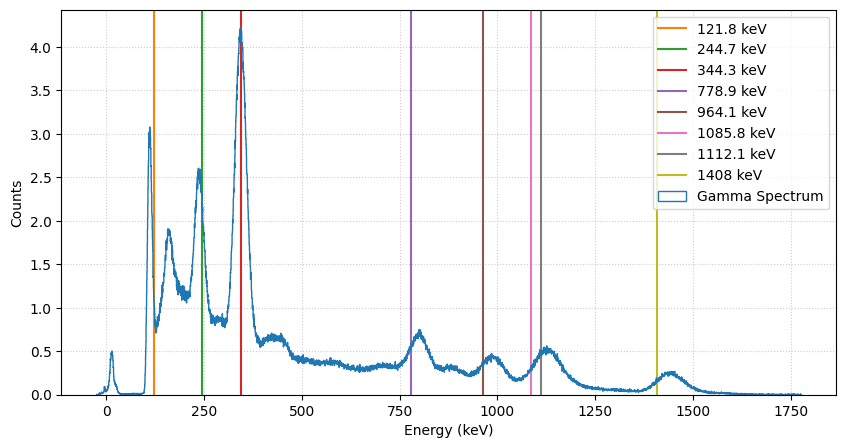

In [5]:
plt.figure(figsize=(10,5))
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid(color='#CCCCCC', linestyle=':')

plt.axvline(121.7817, color='C1', label='121.8 keV', lw=1.5)
plt.axvline(244.6974, color='C2', label='244.7 keV', lw=1.5)
plt.axvline(344.2785, color='C3', label='344.3 keV', lw=1.5)
plt.axvline(778.9045, color='C4', label='778.9 keV', lw=1.5)
plt.axvline(964.057, color='C5', label='964.1 keV', lw=1.5)
plt.axvline(1085.837, color='C6', label='1085.8 keV', lw=1.5)
plt.axvline(1112.076, color='C7', label='1112.1 keV', lw=1.5)
plt.axvline(1408.013, color='C8', label='1408 keV', lw=1.5)

plt.hist(channels_calib, bins=channels_calib, weights=eu_counts, histtype='step', label='Gamma Spectrum')

plt.legend(loc='upper right')